# Image segmentation

In [18]:
import PIL.Image
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


def segment_img(path, k):
    image = np.asarray(PIL.Image.open(path))
    print(f'image shape: {image.shape}')
    
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(X)

    print(f'cluster center shapes: {kmeans.cluster_centers_.shape}, labels shapes: {kmeans.labels_.shape}')
    
    cluster_centers = np.round(kmeans.cluster_centers_).astype(int)
    preds = cluster_centers[kmeans.labels_]
    preds = preds.reshape(image.shape)

    fig, axes = plt.subplots(1, 2, figsize=(12, 48))

    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(preds)
    axes[1].set_title('Segmented Image')
    axes[1].axis('off')

image shape: (533, 800, 3)
cluster center shapes: (8, 3), labels shapes: (426400,)


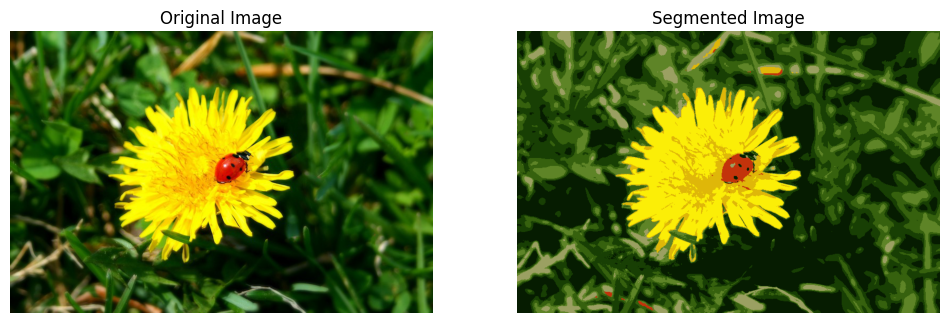

In [24]:
img_path = './data/ladybug_img.png'
segment_img(img_path, k=8)

image shape: (3472, 4624, 3)
cluster center shapes: (8, 3), labels shapes: (16054528,)


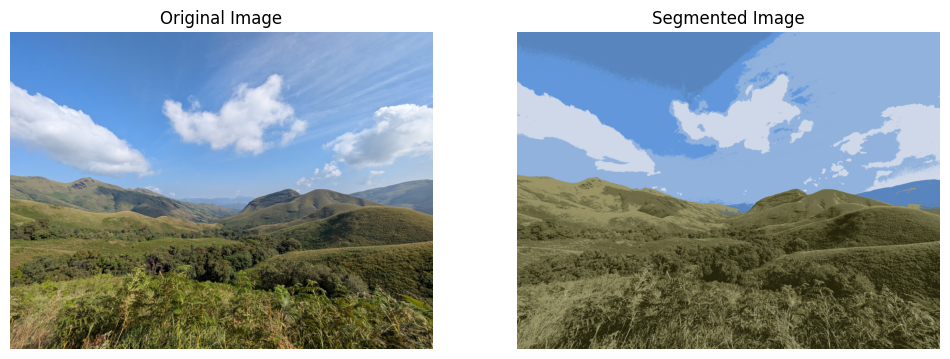

In [25]:
img_path = './data/kudremukh_img.jpg'
segment_img(img_path, k=8)

image shape: (1080, 1920, 3)
cluster center shapes: (4, 3), labels shapes: (2073600,)


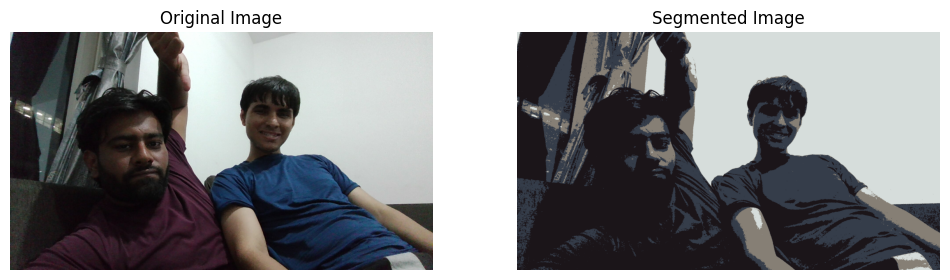

In [36]:
img_path = './data/pranjal_n_me.jpeg'
segment_img(img_path, k=4)